In [1]:
df<-read.csv('d:/data/game/vgsales2.csv')
head(df)
dim(df)

Rank,Name,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,...,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Label
11594,Samurai Warriors 2,Action,1,0,0,0,0,0,0,...,0,0,0,13,0.07,0.01,0.00,0.01,0.08,0
11593,P.N.03 - Product Number Three,Shooter,0,0,0,0,0,0,0,...,0,0,0,16,0.06,0.02,0.00,0.00,0.08,0
11592,Minecraft: Story Mode,Adventure,0,1,0,0,0,0,0,...,0,0,0,4,0.02,0.05,0.00,0.01,0.08,0
11591,Real Robots Final Attack,Shooter,0,0,0,0,0,0,0,...,0,0,0,21,0.00,0.00,0.07,0.01,0.08,0
11590,Pocket Dogs,Misc,0,0,0,1,0,0,0,...,0,0,0,15,0.06,0.02,0.00,0.00,0.08,0
11589,Bleach: Heat the Soul 4,Fighting,0,0,1,0,0,0,0,...,0,0,0,12,0.00,0.00,0.08,0.00,0.08,0


[1] 16324    22

In [2]:
library(dplyr)
df<-df %>% select(-Rank,-Name,-Genre,-Global_Sales)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 16324    18

Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role.Playing,Shooter,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Label
1,0,0,0,0,0,0,0,0,0,0,0,13,0.07,0.01,0.00,0.01,0
0,0,0,0,0,0,0,0,1,0,0,0,16,0.06,0.02,0.00,0.00,0
0,1,0,0,0,0,0,0,0,0,0,0,4,0.02,0.05,0.00,0.01,0
0,0,0,0,0,0,0,0,1,0,0,0,21,0.00,0.00,0.07,0.01,0
0,0,0,1,0,0,0,0,0,0,0,0,15,0.06,0.02,0.00,0.00,0
0,0,1,0,0,0,0,0,0,0,0,0,12,0.00,0.00,0.08,0.00,0



    0     1 
12619  3705 

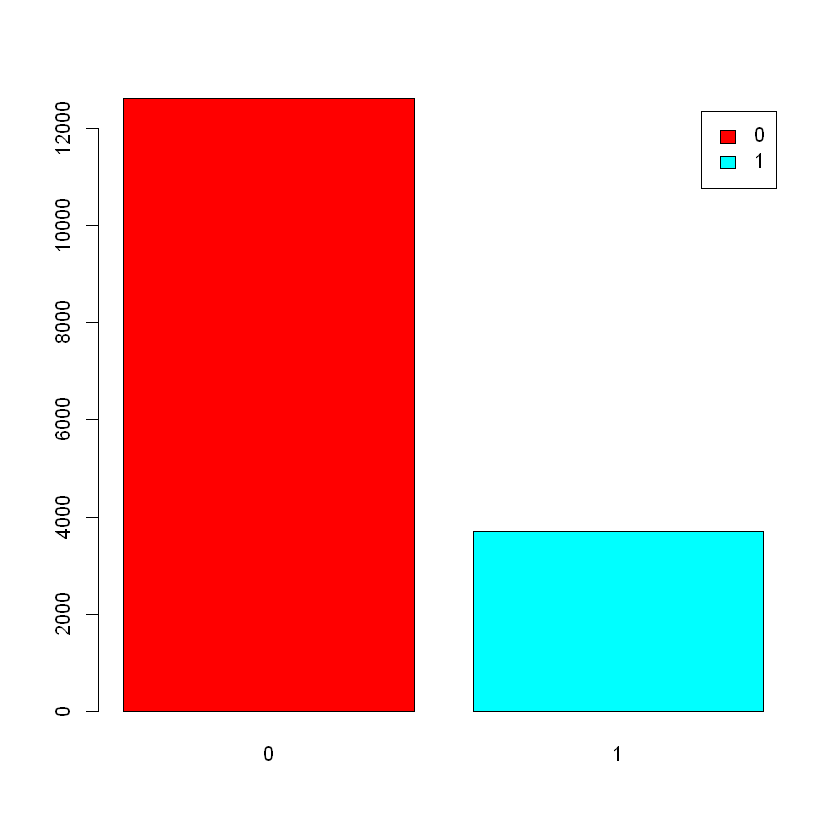

In [3]:
(tbl<-table(df$Label))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [4]:
library(ROSE)
df_samp<-ovun.sample(Label ~ . , data=df, seed=1, method='under',
                    N=3705*2)$data
(tbl<-table(df_samp$Label))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




   0    1 
3705 3705 

In [12]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df$Label, p=0.8, list=F)
train<-df[idx_train,]
X_train<-train[,-18]
y_train<-train[,18]
test<-df[-idx_train,]
X_test<-test[,-18]
y_test<-test[,18]

In [19]:
library(nnet)
model<-nnet(Label ~ . , data=train, size=20)
summary(model)
#17-20-1

# weights:  381
initial  value 2446.325240 
iter  10 value 611.527885
iter  20 value 143.937646
iter  30 value 39.217952
iter  40 value 26.789951
iter  50 value 15.722786
iter  60 value 9.801918
iter  70 value 6.862928
iter  80 value 4.631243
iter  90 value 3.247312
iter 100 value 3.021857
final  value 3.021857 
stopped after 100 iterations


a 17-20-1 network with 381 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   3.41    0.78   -0.38    0.20    0.56    0.55    0.18   -0.15   -0.13    0.89 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 
  -0.56    0.85   -0.05   32.47    7.01    4.87    1.23    1.12 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -5.16   10.58   -0.63   -3.31   -5.22    0.80   -1.08    1.35   -3.87   -5.08 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 
   1.58   -0.66    0.09   19.38   -1.86   -2.44   -1.14    0.20 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -1.38   -0.41   -0.66    0.36   -0.20   -0.14   -0.67   -0.08    0.36    0.67 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 
   0.07    0.33    0.28  -13.85    2.96    1.84    1.42    0.14 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i

In [20]:
names(model)
head(model$wts)

[1] "n"             "nunits"        "nconn"         "conn"         
 [5] "nsunits"       "decay"         "entropy"       "softmax"      
 [9] "censored"      "value"         "wts"           "convergence"  
[13] "fitted.values" "residuals"     "call"          "terms"        
[17] "coefnames"     "xlevels"

[1]  3.4086227  0.7780426 -0.3813117  0.1950425  0.5616590  0.5510982

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d


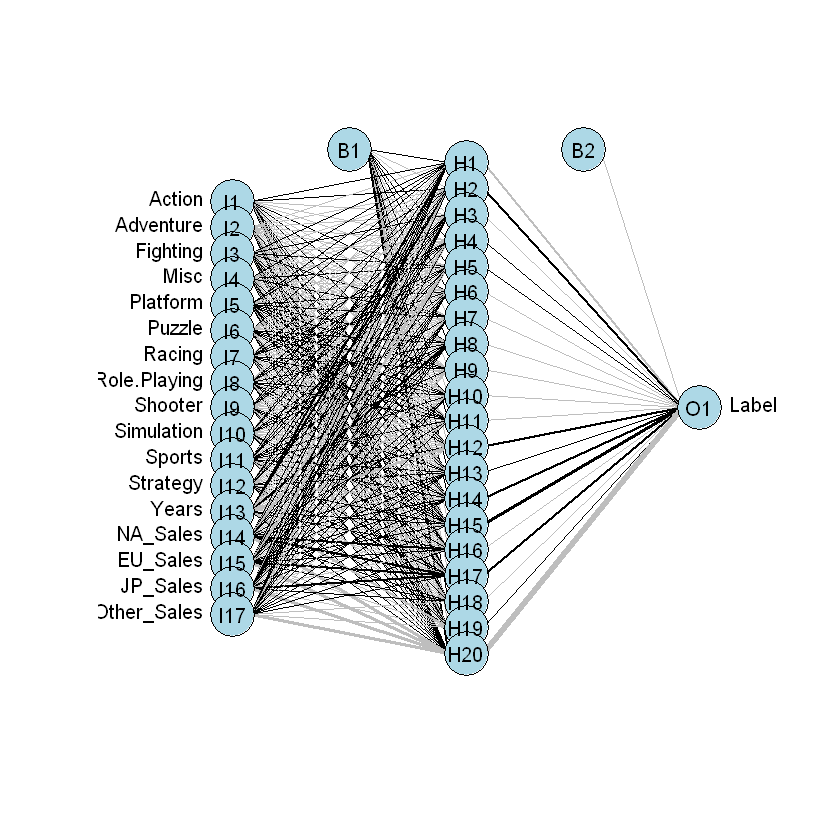

In [21]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

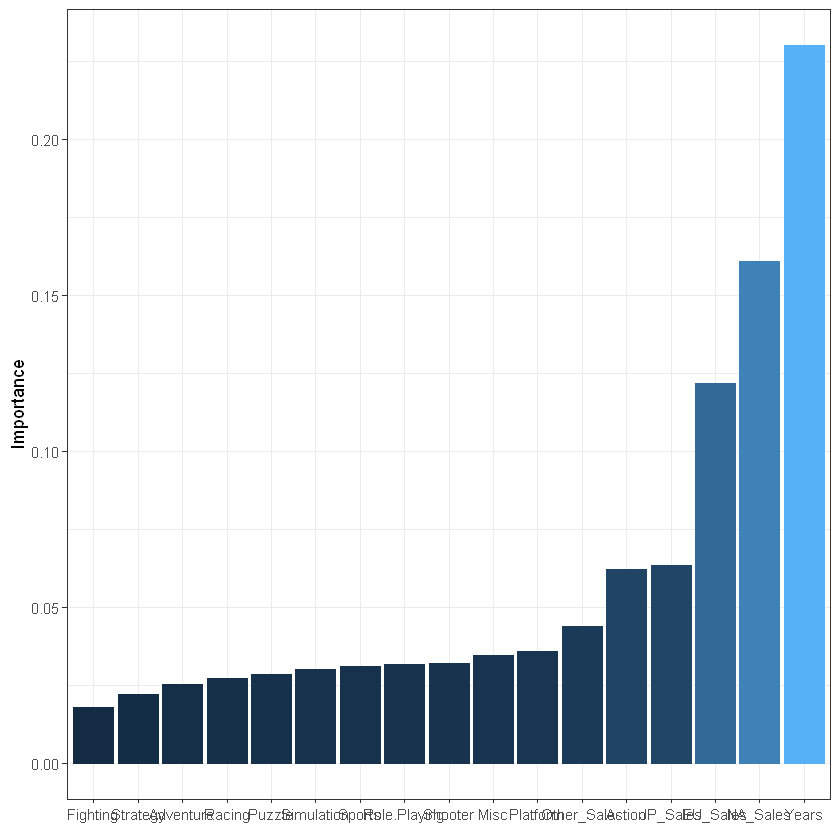

In [22]:
library(NeuralNetTools)
garson(model)
#변수의 중요도 #year > National > 

In [23]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train) #모형이 예측한 값
result<-round(pred) #반올림 처리
#result
table(y_train,result) #오분류표
mean(y_train==result) #예측정확도

       result
y_train     0     1
      0 10079     3
      1     0  2978

[1] 0.9997703

In [24]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test    0    1
     0 2537    0
     1    5  722

[1] 0.9984681